In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Input data files are available in the read-only "../dataset/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\test.csv
dataset\train.csv
dataset\train_data_dict.csv


In [43]:
train_data=pd.read_csv('dataset/train.csv', header=0)
test_data=pd.read_csv('dataset/test.csv', header=0)

In [44]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [45]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [46]:
train_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [48]:
train_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [49]:
test_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

#### As we can see from the data there are two columns having null values in them namely : 
        * Bed Grade
        * City_Code_Patient
        
Lets deal with them first

As the numbers of missing data is very low so we are simply replacing the missing data with the maximum occuring element in Bed Grade

In [50]:
train_data['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [51]:


# train_data['Bed Grade'].fillna(-999, inplace = True) 
# test_data['Bed Grade'].fillna(-999, inplace = True) 

train_data['Bed Grade'].fillna(2.0, inplace = True) 
test_data['Bed Grade'].fillna(2.0, inplace = True) 




In [52]:
train_data["Bed Grade"].replace({2.0: "2", 3.0: "3", 4.0: "4", 1.0: "1"}, inplace=True)
test_data["Bed Grade"].replace({2.0: "2", 3.0: "3", 4.0: "4", 1.0: "1"}, inplace=True)


In [53]:
train_data['Bed Grade'].value_counts()

2    123784
3    110583
4     57566
1     26505
Name: Bed Grade, dtype: int64

To replace the missing data in City_Code_Patient we create a new label with id "ukn"

In [54]:
train_data['City_Code_Patient'].fillna("ukn", inplace = True) 
test_data['City_Code_Patient'].fillna("ukn", inplace = True) 

In [55]:
train_data['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
ukn       4532
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [57]:
train_data['City_Code_Hospital'] = train_data['City_Code_Hospital'].apply(str)
test_data['City_Code_Hospital'] = test_data['City_Code_Hospital'].apply(str)


train_data['City_Code_Patient'] = train_data['City_Code_Patient'].apply(str)
test_data['City_Code_Patient'] = test_data['City_Code_Patient'].apply(str)


train_data['Hospital_code'] = train_data['Hospital_code'].apply(str)
test_data['Hospital_code'] = test_data['Hospital_code'].apply(str)

In [58]:
numerical_columns=['case_id','Available Extra Rooms in Hospital','patientid',
                  'Visitors with Patient','Admission_Deposit']


#having case_id and patient_id makes no sense so its better to remove them 

numerical_columns_rx=['Available Extra Rooms in Hospital',
                  'Visitors with Patient','Admission_Deposit']


caterogical_columns=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code',
                    'Type of Admission','Severity of Illness','Age','Bed Grade','City_Code_Hospital',
                    'City_Code_Patient','Hospital_code']

In [59]:
train_data['Type of Admission'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

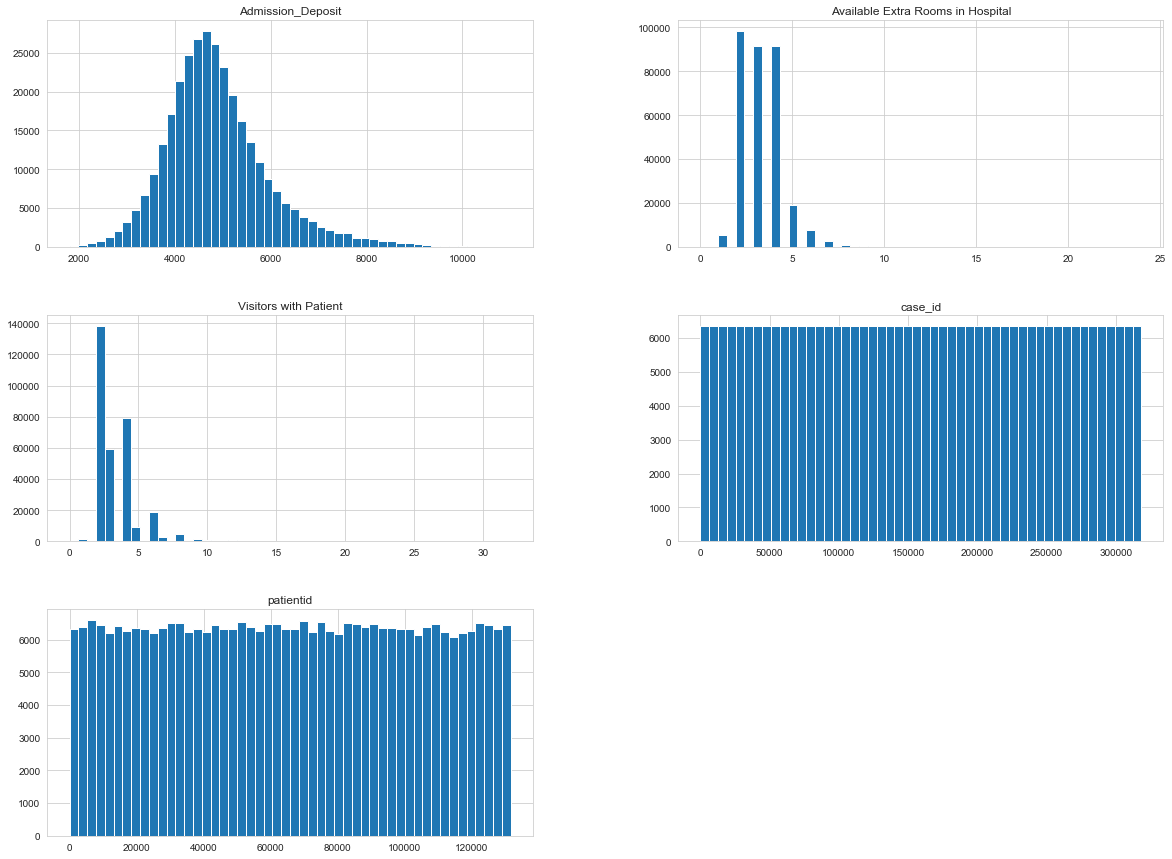

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B4BAF708>,
      dtype=object)

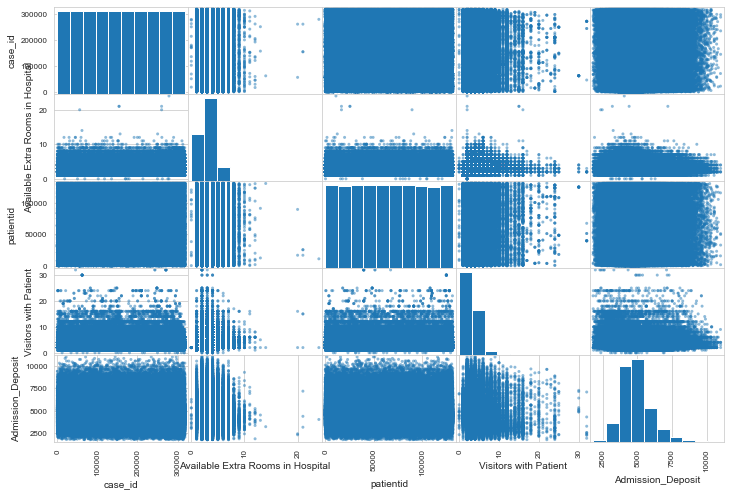

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data[numerical_columns], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B4BEDAC8>,
      dtype=object)

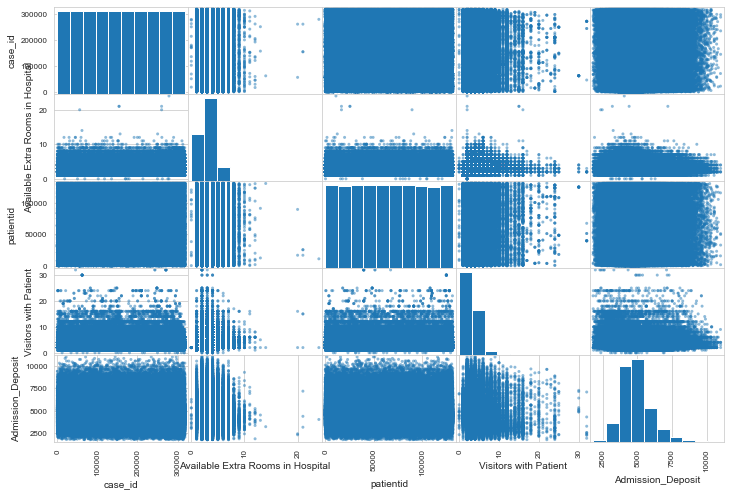

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data, figsize=(12, 8))

# Create the Correlation Graph 

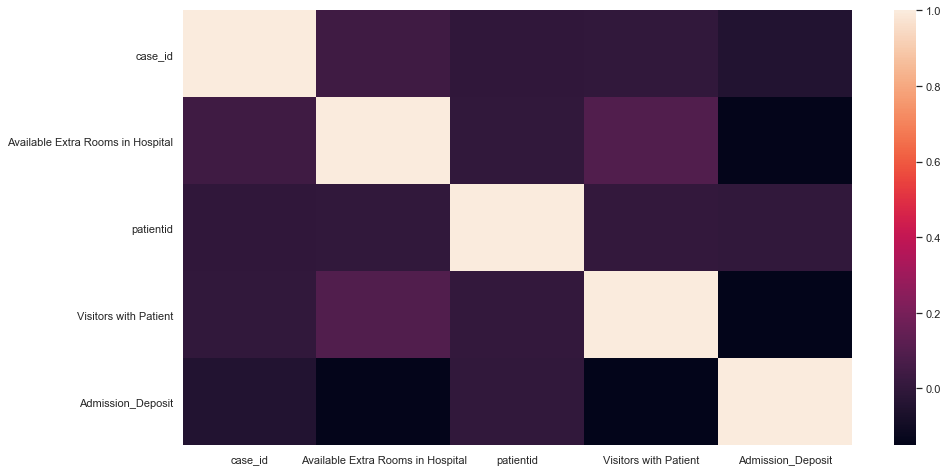

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr())

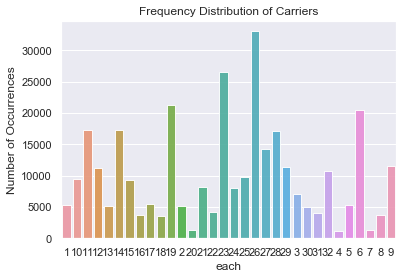

<Figure size 4320x1728 with 0 Axes>

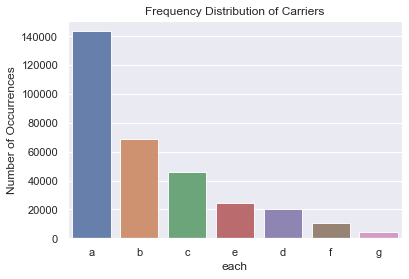

<Figure size 4320x1728 with 0 Axes>

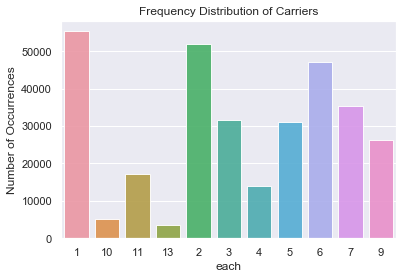

<Figure size 4320x1728 with 0 Axes>

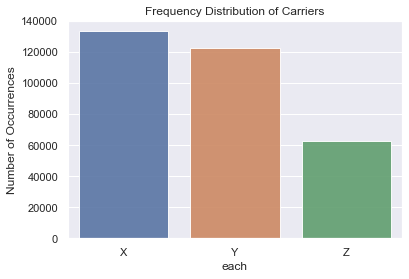

<Figure size 4320x1728 with 0 Axes>

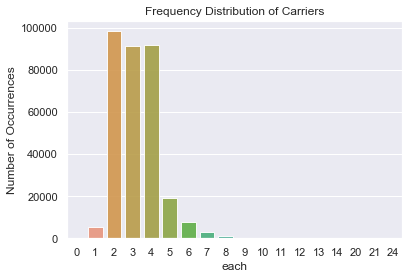

<Figure size 4320x1728 with 0 Axes>

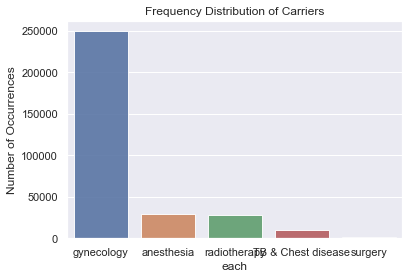

<Figure size 4320x1728 with 0 Axes>

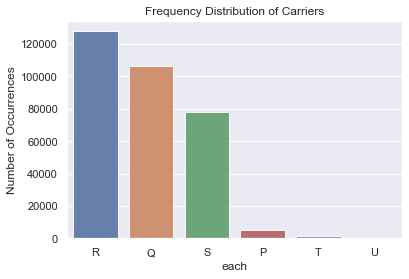

<Figure size 4320x1728 with 0 Axes>

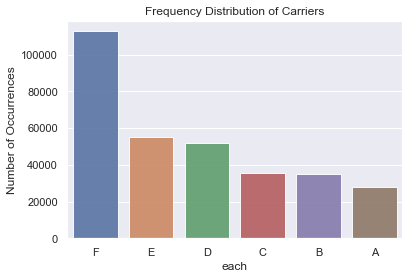

<Figure size 4320x1728 with 0 Axes>

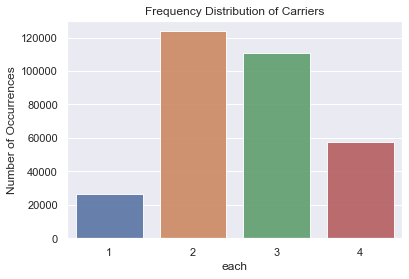

<Figure size 4320x1728 with 0 Axes>

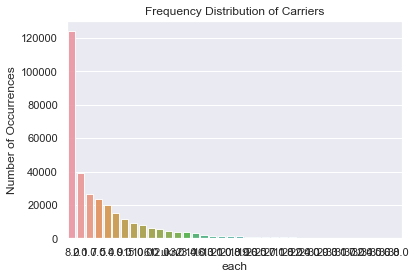

<Figure size 4320x1728 with 0 Axes>

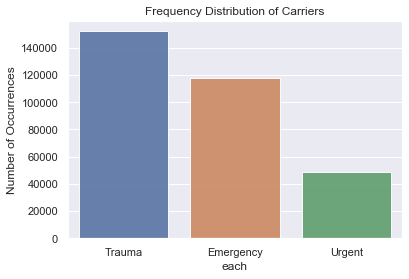

<Figure size 4320x1728 with 0 Axes>

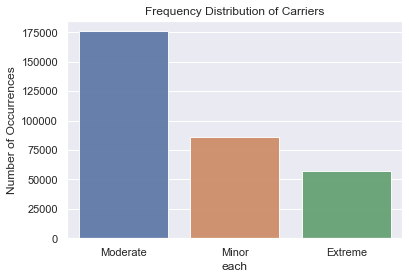

<Figure size 4320x1728 with 0 Axes>

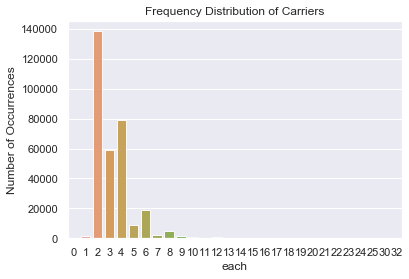

<Figure size 4320x1728 with 0 Axes>

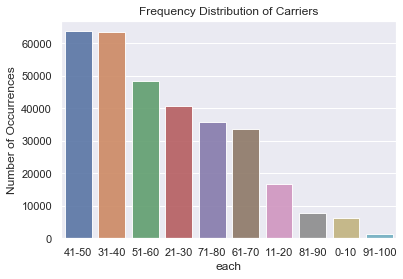

<Figure size 4320x1728 with 0 Axes>

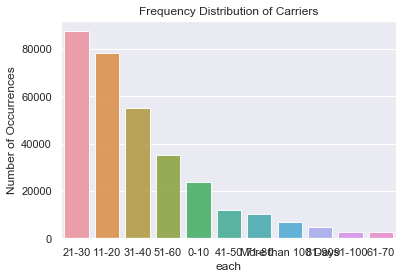

<Figure size 4320x1728 with 0 Axes>

In [23]:
for each in train_data.columns.to_list():
    #print(len(train_data[each].unique()),each)
    if len(train_data[each].unique())<40:
        carrier_count = train_data[each].value_counts()
        sns.set(style="darkgrid")
        sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
        plt.title('Frequency Distribution of Carriers')
        plt.ylabel('Number of Occurrences', fontsize=12)
        plt.xlabel('each', fontsize=12)
        plt.figure(figsize=(60,24))
        plt.show()

# Import the relevat modules

In [61]:
# Standard ML Models for comparison

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy


In [62]:
train_data[numerical_columns].describe()

,case_id,Available Extra Rooms in Hospital,patientid,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,3.197627,65747.579472,3.284099,4880.749392
std,91925.276847,1.168171,37979.936440,1.764061,1086.776254
min,1.000000,0.000000,1.000000,0.000000,1800.000000
25%,79610.250000,2.000000,32847.000000,2.000000,4186.000000
50%,159219.500000,3.000000,65724.500000,3.000000,4741.000000
75%,238828.750000,4.000000,98470.000000,4.000000,5409.000000
max,318438.000000,24.000000,131624.000000,32.000000,11008.000000


# One Hot Encoding Of the caterorical Columns  and transforming the data

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")


from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="most_frequent")),
('std_scaler', StandardScaler()),
])



from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

num_attribs = numerical_columns_rx
cat_attribs = caterogical_columns




full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
train_data_prepared = full_pipeline.fit_transform(train_data)

test_data_prepared = full_pipeline.fit_transform(test_data)



In [65]:
train_data_prepared.toarray().shape

(318438, 131)

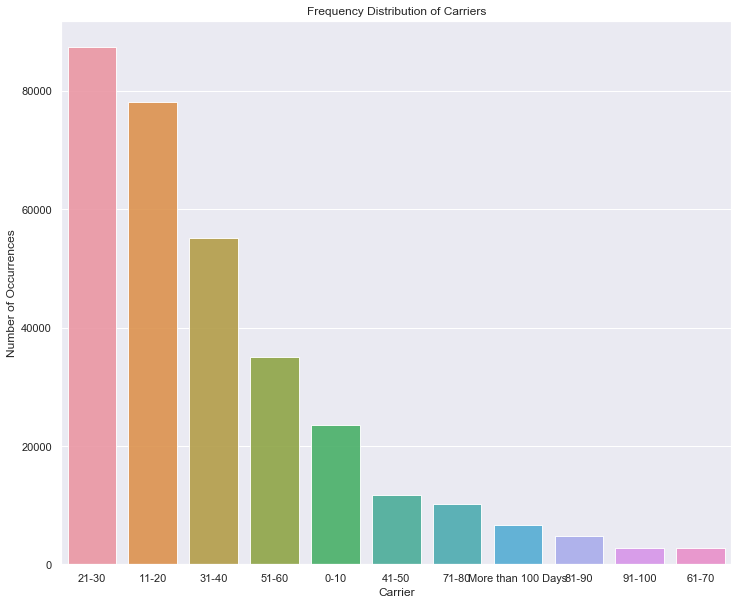

<Figure size 1440x576 with 0 Axes>

In [66]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Dealing with Categorical Data

In [67]:
train_data_prepared


<318438x131 sparse matrix of type '<class 'numpy.float64'>'
	with 4776570 stored elements in Compressed Sparse Row format>

# Transforming numpy array to dataframe

In [68]:
# train_data_transform = pd.DataFrame(data=train_data_prepared[0:,0:],index=[i for i in range(train_data_prepared.shape[0])],
#                                     columns=['f'+str(i) for i in range(train_data_prepared.shape[1])])

# Feature Engineering of the Admission Deposit Columns

In [69]:
# train_data_transform

In [33]:
# ['case_id', 'Hospital_code', 'City_Code_Hospital',
#        'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'Visitors with Patient', 'Admission_Deposit',
#        'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
#        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','City_Code_Patient',
#        'Age','Stay']

train_data_transformed=train_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(train_data_transform)

test_data_transformed=test_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(test_data_transform)

train_data_transformed=train_data_transformed[[  'Admission_Deposit',
       
       'Stay']]  #'case_id','patientid','Hospital_region_code','Hospital_code', 'City_Code_Hospital',
    #'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient','Hospital_type_code', 'Department', 'Ward_Type',
    #'City_Code_Patient','Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','Age'


test_data_transformed=test_data_transformed[[   'Admission_Deposit'
       ]] #'case_id','patientid','Hospital_region_code','Hospital_code', 'City_Code_Hospital',
    #'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient'
    #'Hospital_type_code', 'Department', 'Ward_Type','City_Code_Patient',
       #'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',

In [70]:
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data_prepared.corr())

# Creating Traing, test , and Validation Splits

In [71]:
valid_fraction = 0.05
valid_size = int(len(train_data) * valid_fraction)

train = train_data_prepared[:-2 * valid_size]
valid = train_data_prepared[-2 * valid_size:-valid_size]
test = train_data_prepared[-valid_size:]


train_l = train_data[:-2 * valid_size]
valid_l = train_data[-2 * valid_size:-valid_size]
test_l = train_data[-valid_size:]



In [72]:
#!pip install lightgbm

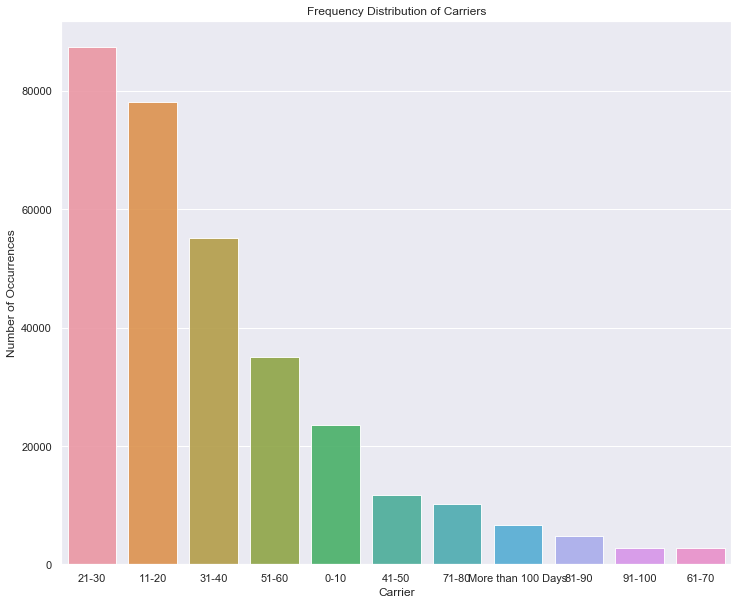

<Figure size 1440x576 with 0 Axes>

In [73]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Trying With XGBOOST 

In [74]:
#!pip install xgboost

In [75]:
# import xgboost

# from sklearn.metrics import mean_absolute_error
# from xgboost import XGBRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score



# feature_cols = train.columns.drop('Stay')

# # Define the model
# my_model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.15)

# # Fit the model
# my_model_3.fit(train[feature_cols], train['Stay'],
#              early_stopping_rounds=5,
#              eval_set=[(valid[feature_cols], valid['Stay'])],
#              verbose=False) # Your code here

# # Get predictions
# #predictions_3 = my_model_3.predict(X_valid)

# eval_score = accuracy_score(test['Stay'], my_model_3.predict(test[feature_cols]))

# print('Eval ACC: {}'.format(eval_score))



# Trying with Lightgbm

In [76]:
print(test.shape)
print(len(test_l['Stay']))


(15921, 131)
15921


In [77]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [
# {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
# {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
# scoring='neg_mean_squared_error',
# return_train_score=True)
# grid_search.fit(train_data_prepared, train_data['Stay'])

In [78]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter

#feature_cols = train.columns.drop('Stay')

# dtrain = lgb.Dataset(train[feature_cols], label=train['Stay'])
# dvalid = lgb.Dataset(valid[feature_cols], label=valid['Stay'])

#param = {'num_leaves': 64, 'objective': 'multiclass'}
params = {}
params['learning_rate'] = 0.047
params['max_depth'] = 50
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.12, 1: 0.38, 2: 0.42, 3: 0.27, 4: 0.07, 5: 0.18, 6: 0.02, 7: 0.06, 8: 0.03, 9: 0.02, 10: 0.04}
#{0: 0.10, 1: 0.10, 2: 0.10, 3: 0.10, 4: 0.10, 5: 0.10, 6: 0.10, 7: 0.10, 8: 0.10, 9: 0.10, 10: 0.10}
# {0: 0.12, 1: 0.38, 2: 0.42, 3: 0.27, 4: 0.07, 5: 0.18, 6: 0.02, 7: 0.06, 8: 0.03, 9: 0.02, 10: 0.04}

clf = lgb.LGBMClassifier(**params)
clf.fit(train, train_l['Stay'], early_stopping_rounds=100, eval_set=[(valid, valid_l['Stay']),
        (test, test_l['Stay'])], eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(test_l['Stay'], clf.predict(test))

print('Eval ACC: {}'.format(eval_score))



[1]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.87415	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.84004
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.86186	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.8287
[3]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.8457	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.81538
[4]	valid_0's multi_error: 0.746875	valid_0's multi_logloss: 1.83113	valid_1's multi_error: 0.739024	valid_1's multi_logloss: 1.8027
[5]	valid_0's multi_error: 0.7443	valid_0's multi_logloss: 1.82028	valid_1's multi_error: 0.736449	valid_1's multi_logloss: 1.79277
[6]	valid_0's multi_error: 0.734125	valid_0's multi_logloss: 1.8081	valid_1's multi_error: 0.728912	valid_1's multi_logloss: 1.78201
[7]	valid_0's multi_error: 0.728723	valid_0's multi_logloss: 1.79786	valid_1's multi_error: 0.723698	valid_1's multi_logloss: 1.77299
[8]	va

[62]	valid_0's multi_error: 0.60907	valid_0's multi_logloss: 1.6073	valid_1's multi_error: 0.615665	valid_1's multi_logloss: 1.59568
[63]	valid_0's multi_error: 0.608442	valid_0's multi_logloss: 1.60597	valid_1's multi_error: 0.616105	valid_1's multi_logloss: 1.59437
[64]	valid_0's multi_error: 0.608316	valid_0's multi_logloss: 1.60467	valid_1's multi_error: 0.615225	valid_1's multi_logloss: 1.59316
[65]	valid_0's multi_error: 0.608316	valid_0's multi_logloss: 1.60318	valid_1's multi_error: 0.6151	valid_1's multi_logloss: 1.59176
[66]	valid_0's multi_error: 0.608379	valid_0's multi_logloss: 1.60203	valid_1's multi_error: 0.615665	valid_1's multi_logloss: 1.5907
[67]	valid_0's multi_error: 0.608379	valid_0's multi_logloss: 1.60114	valid_1's multi_error: 0.615539	valid_1's multi_logloss: 1.5898
[68]	valid_0's multi_error: 0.608504	valid_0's multi_logloss: 1.60041	valid_1's multi_error: 0.615916	valid_1's multi_logloss: 1.58897
[69]	valid_0's multi_error: 0.607939	valid_0's multi_logloss:

[123]	valid_0's multi_error: 0.603668	valid_0's multi_logloss: 1.5676	valid_1's multi_error: 0.610075	valid_1's multi_logloss: 1.55733
[124]	valid_0's multi_error: 0.603794	valid_0's multi_logloss: 1.56726	valid_1's multi_error: 0.609698	valid_1's multi_logloss: 1.55695
[125]	valid_0's multi_error: 0.603668	valid_0's multi_logloss: 1.56691	valid_1's multi_error: 0.609572	valid_1's multi_logloss: 1.55661
[126]	valid_0's multi_error: 0.603731	valid_0's multi_logloss: 1.56662	valid_1's multi_error: 0.609635	valid_1's multi_logloss: 1.55627
[127]	valid_0's multi_error: 0.603919	valid_0's multi_logloss: 1.56629	valid_1's multi_error: 0.609698	valid_1's multi_logloss: 1.55596
[128]	valid_0's multi_error: 0.603982	valid_0's multi_logloss: 1.56605	valid_1's multi_error: 0.609949	valid_1's multi_logloss: 1.55565
[129]	valid_0's multi_error: 0.603919	valid_0's multi_logloss: 1.5657	valid_1's multi_error: 0.609572	valid_1's multi_logloss: 1.55529
[130]	valid_0's multi_error: 0.603857	valid_0's mu

[184]	valid_0's multi_error: 0.602726	valid_0's multi_logloss: 1.55551	valid_1's multi_error: 0.606557	valid_1's multi_logloss: 1.54513
[185]	valid_0's multi_error: 0.602412	valid_0's multi_logloss: 1.55536	valid_1's multi_error: 0.606306	valid_1's multi_logloss: 1.54499
[186]	valid_0's multi_error: 0.602726	valid_0's multi_logloss: 1.55522	valid_1's multi_error: 0.606369	valid_1's multi_logloss: 1.54483
[187]	valid_0's multi_error: 0.602663	valid_0's multi_logloss: 1.5551	valid_1's multi_error: 0.606306	valid_1's multi_logloss: 1.54471
[188]	valid_0's multi_error: 0.602223	valid_0's multi_logloss: 1.55498	valid_1's multi_error: 0.606243	valid_1's multi_logloss: 1.5446
[189]	valid_0's multi_error: 0.602098	valid_0's multi_logloss: 1.55482	valid_1's multi_error: 0.606432	valid_1's multi_logloss: 1.54442
[190]	valid_0's multi_error: 0.601847	valid_0's multi_logloss: 1.55468	valid_1's multi_error: 0.606432	valid_1's multi_logloss: 1.54429
[191]	valid_0's multi_error: 0.601658	valid_0's mu

[245]	valid_0's multi_error: 0.599711	valid_0's multi_logloss: 1.54927	valid_1's multi_error: 0.604547	valid_1's multi_logloss: 1.53932
[246]	valid_0's multi_error: 0.599585	valid_0's multi_logloss: 1.54917	valid_1's multi_error: 0.604359	valid_1's multi_logloss: 1.53928
[247]	valid_0's multi_error: 0.599837	valid_0's multi_logloss: 1.54909	valid_1's multi_error: 0.604673	valid_1's multi_logloss: 1.5392
[248]	valid_0's multi_error: 0.5999	valid_0's multi_logloss: 1.54902	valid_1's multi_error: 0.604485	valid_1's multi_logloss: 1.53913
[249]	valid_0's multi_error: 0.600025	valid_0's multi_logloss: 1.54894	valid_1's multi_error: 0.604422	valid_1's multi_logloss: 1.53907
[250]	valid_0's multi_error: 0.599962	valid_0's multi_logloss: 1.54885	valid_1's multi_error: 0.604171	valid_1's multi_logloss: 1.539
[251]	valid_0's multi_error: 0.599962	valid_0's multi_logloss: 1.54882	valid_1's multi_error: 0.604233	valid_1's multi_logloss: 1.53894
[252]	valid_0's multi_error: 0.600025	valid_0's multi

[306]	valid_0's multi_error: 0.599523	valid_0's multi_logloss: 1.54603	valid_1's multi_error: 0.602475	valid_1's multi_logloss: 1.5363
[307]	valid_0's multi_error: 0.5999	valid_0's multi_logloss: 1.54601	valid_1's multi_error: 0.6026	valid_1's multi_logloss: 1.53626
[308]	valid_0's multi_error: 0.5999	valid_0's multi_logloss: 1.54599	valid_1's multi_error: 0.602286	valid_1's multi_logloss: 1.53622
[309]	valid_0's multi_error: 0.600088	valid_0's multi_logloss: 1.54595	valid_1's multi_error: 0.602098	valid_1's multi_logloss: 1.53615
[310]	valid_0's multi_error: 0.599962	valid_0's multi_logloss: 1.54589	valid_1's multi_error: 0.602223	valid_1's multi_logloss: 1.53615
[311]	valid_0's multi_error: 0.600025	valid_0's multi_logloss: 1.54588	valid_1's multi_error: 0.602349	valid_1's multi_logloss: 1.5361
[312]	valid_0's multi_error: 0.600025	valid_0's multi_logloss: 1.54585	valid_1's multi_error: 0.602349	valid_1's multi_logloss: 1.53608
[313]	valid_0's multi_error: 0.599774	valid_0's multi_lo

[367]	valid_0's multi_error: 0.597952	valid_0's multi_logloss: 1.5444	valid_1's multi_error: 0.601721	valid_1's multi_logloss: 1.53456
[368]	valid_0's multi_error: 0.597701	valid_0's multi_logloss: 1.54438	valid_1's multi_error: 0.601847	valid_1's multi_logloss: 1.53452
[369]	valid_0's multi_error: 0.597764	valid_0's multi_logloss: 1.54437	valid_1's multi_error: 0.601784	valid_1's multi_logloss: 1.53451
[370]	valid_0's multi_error: 0.597764	valid_0's multi_logloss: 1.54435	valid_1's multi_error: 0.601909	valid_1's multi_logloss: 1.5345
[371]	valid_0's multi_error: 0.598015	valid_0's multi_logloss: 1.54434	valid_1's multi_error: 0.601721	valid_1's multi_logloss: 1.53449
[372]	valid_0's multi_error: 0.59789	valid_0's multi_logloss: 1.54429	valid_1's multi_error: 0.601784	valid_1's multi_logloss: 1.53445
[373]	valid_0's multi_error: 0.59789	valid_0's multi_logloss: 1.54429	valid_1's multi_error: 0.601784	valid_1's multi_logloss: 1.53444
[374]	valid_0's multi_error: 0.598015	valid_0's mult

[428]	valid_0's multi_error: 0.598392	valid_0's multi_logloss: 1.54333	valid_1's multi_error: 0.601909	valid_1's multi_logloss: 1.53368
[429]	valid_0's multi_error: 0.598455	valid_0's multi_logloss: 1.54331	valid_1's multi_error: 0.601721	valid_1's multi_logloss: 1.53369
[430]	valid_0's multi_error: 0.598518	valid_0's multi_logloss: 1.54332	valid_1's multi_error: 0.601784	valid_1's multi_logloss: 1.53367
[431]	valid_0's multi_error: 0.598518	valid_0's multi_logloss: 1.54333	valid_1's multi_error: 0.601909	valid_1's multi_logloss: 1.53365
[432]	valid_0's multi_error: 0.598643	valid_0's multi_logloss: 1.54329	valid_1's multi_error: 0.601847	valid_1's multi_logloss: 1.53364
[433]	valid_0's multi_error: 0.598392	valid_0's multi_logloss: 1.54325	valid_1's multi_error: 0.601909	valid_1's multi_logloss: 1.53363
[434]	valid_0's multi_error: 0.598455	valid_0's multi_logloss: 1.54326	valid_1's multi_error: 0.601658	valid_1's multi_logloss: 1.53362
[435]	valid_0's multi_error: 0.598141	valid_0's 

In [80]:

# preds = clf.predict(test_data_prepared)

# Counter(train['Stay'])

In [81]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)


clf = lgb.LGBMClassifier(**params)

clf.fit(train_data_prepared, train_data['Stay'], eval_metric='multi_error', verbose=False)

# eval_score_auc = roc_auc_score(df_train[label_col], clf.predict(df_train[feature_cols]))
eval_score_acc = accuracy_score(train_data['Stay'], clf.predict(train_data_prepared))

print('ACC: {}'.format(eval_score_acc))

{'learning_rate': 0.047, 'max_depth': 50, 'n_estimators': 358, 'objective': 'multiclass', 'boosting_type': 'gbdt', 'subsample': 0.7, 'random_state': 42, 'colsample_bytree': 0.7, 'min_data_in_leaf': 55, 'reg_alpha': 1.7, 'reg_lambda': 1.11}
ACC: 0.4365151144021756


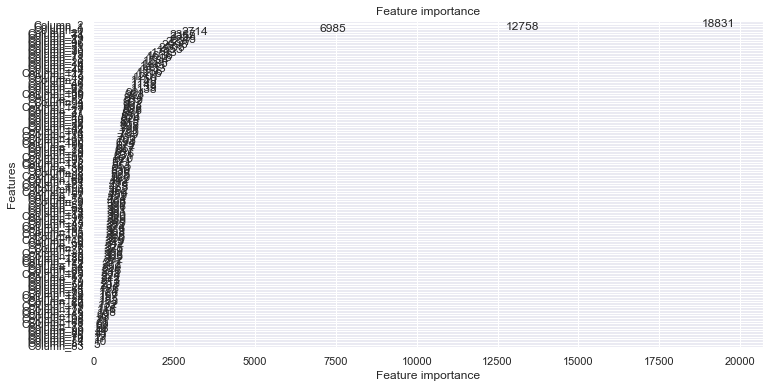

In [82]:
preds = clf.predict(test_data_prepared)

Counter(preds)
submission = pd.DataFrame({'case_id':test_data['case_id'], 'Stay':preds})


plt.rcParams['figure.figsize'] = (12, 6)
lgb.plot_importance(clf)
plt.show()

In [83]:
print(train_data['Stay'].unique())
print(submission['Stay'].unique())

['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']
['0-10' '51-60' '21-30' '11-20' '31-40' 'More than 100 Days' '81-90'
 '71-80' '91-100' '41-50']


In [84]:
submission

#"0": '0-10, "1": "11-20", "2": "21-30", "3": "31-40", "4": "41-50", "5": "51-60", "6": "61-70" , "7": "71-80", "8": "81-90", "9": "91-100", "10": "More than 100 Days"

submission["Stay"].replace({0: "0-10", 1: "11-20", 2: "21-30", 3: "31-40", 4: "41-50", 5: "51-60", 6: "61-70" , 7: "71-80", 8: "81-90", 9: "91-100", 10: "More than 100 Days"}, inplace=True)



In [85]:
submission.to_csv('submission.csv', index=False)

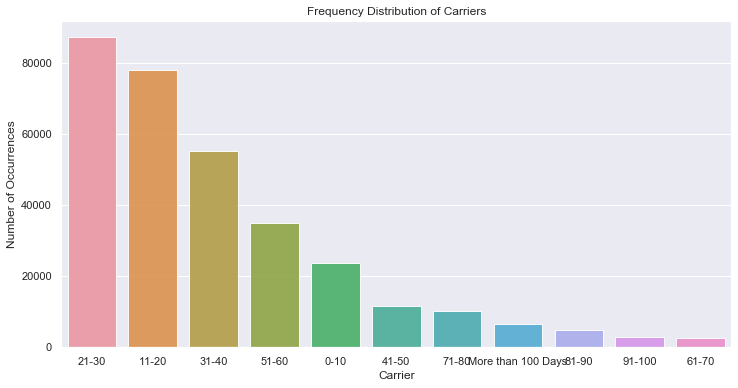

<Figure size 1440x576 with 0 Axes>

In [86]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()


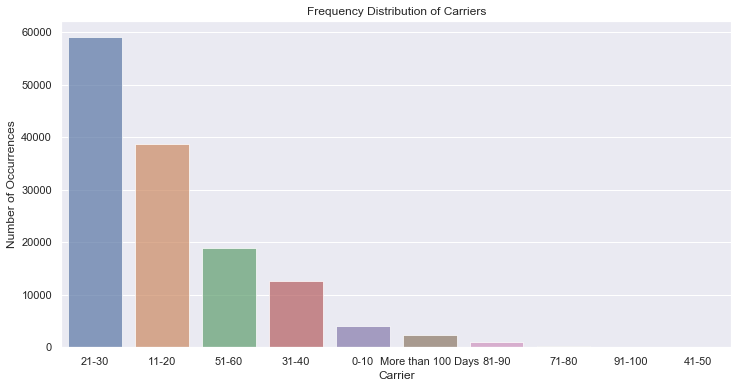

<Figure size 1440x576 with 0 Axes>

In [87]:
carrier_count = submission['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.7)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# PUBLIC ACCURACY SCORE ACHIVED IN AV PLATFORM  42.7784466090256